# Airline Passenger Satisfaction

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

In [134]:
# Chemin vers le fichier Excel
airline_passenger_satisfaction_train = "./archive/train.csv"
airline_passenger_satisfaction_test = "./archive/test.csv"

# Lire le fichier Excel et le convertir en DataFrame
train = pd.read_csv(airline_passenger_satisfaction_train)
test = pd.read_csv(airline_passenger_satisfaction_test)

## Nettoyage et analyse exploratoire des données 

In [135]:
train.shape

(103904, 25)

In [136]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [137]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

### Pour préparer les données pour l'entraînement d'un modèle, nous devons effectuer les actions suivantes sur le jeu de données d'entraînement :

Encodage des variables catégorielles : Les algorithmes de machine learning nécessitent des données numériques. Nous devons donc convertir les variables catégorielles en variables numériques à l'aide de techniques comme le codage one-hot ou le label encoding.

Suppression des colonnes inutiles : Certaines colonnes, telles que 'Unnamed:0' et 'id', ne sont pas pertinentes pour la prédiction et peuvent être supprimées pour simplifier le jeu de données.

In [138]:
def process_data(df):
    # Supprimer les colonnes inutiles
    df = df.drop(['Unnamed: 0', 'id'], axis=1)
    
    # Remplacer les valeurs catégorielles par des valeurs numériques
    df['Gender'] = df['Gender'].replace({'Female': 1, 'Male': 0})
    df['Customer Type'] = df['Customer Type'].replace({'Loyal Customer': 1, 'disloyal Customer': 0})
    df['Type of Travel'] = df['Type of Travel'].replace({'Business travel': 1, 'Personal Travel': 0})
    df['Class'] = df['Class'].replace({'Business': 2, 'Eco Plus': 1, 'Eco': 0})
    df['satisfaction'] = df['satisfaction'].replace({'satisfied': 1, 'neutral or dissatisfied': 0})
    
    # Remplacer les valeurs manquantes dans 'Arrival Delay in Minutes' par la médiane
    df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace=True)
    
    return df

train = process_data(train)
test = process_data(test)


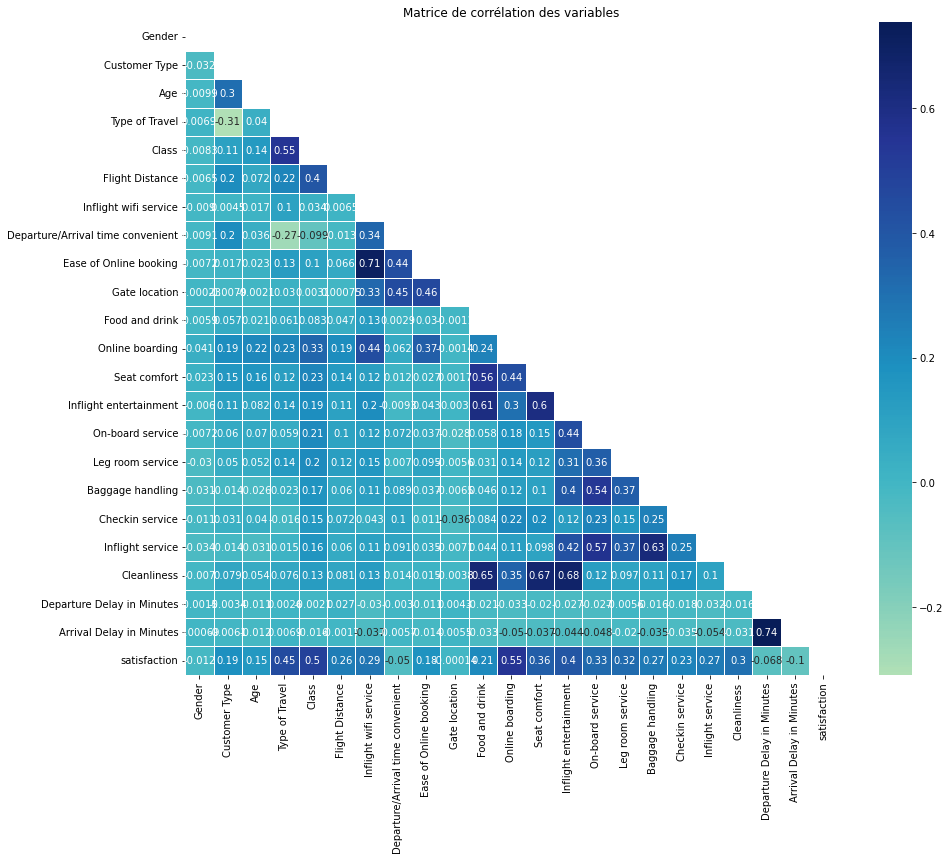

In [139]:
# Calcul de la matrice de corrélation
corr = train.corr(method='spearman')


mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 12))

sns.heatmap(corr, annot=True, mask=mask, cmap="YlGnBu", center=0,
            square=True, linewidths=.5)
plt.title("Matrice de corrélation des variables")

plt.show()

## Construction du modèle 

In [140]:
# Séparation des features et de la target
X = train.drop('satisfaction', axis=1)
y = train['satisfaction']

In [141]:
# Normalisation des features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [142]:
# Séparation des données d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [143]:
# Création du modèle
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [144]:
# Compilation du modèle
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [145]:
# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_val, y_val), verbose=2)

Epoch 1/25
1299/1299 - 3s - loss: 0.3200 - accuracy: 0.8730 - val_loss: 0.1861 - val_accuracy: 0.9283 - 3s/epoch - 2ms/step
Epoch 2/25
1299/1299 - 3s - loss: 0.2190 - accuracy: 0.9134 - val_loss: 0.1668 - val_accuracy: 0.9312 - 3s/epoch - 2ms/step
Epoch 3/25
1299/1299 - 2s - loss: 0.1902 - accuracy: 0.9243 - val_loss: 0.1418 - val_accuracy: 0.9432 - 2s/epoch - 2ms/step
Epoch 4/25
1299/1299 - 2s - loss: 0.1683 - accuracy: 0.9330 - val_loss: 0.1218 - val_accuracy: 0.9491 - 2s/epoch - 2ms/step
Epoch 5/25
1299/1299 - 2s - loss: 0.1532 - accuracy: 0.9397 - val_loss: 0.1180 - val_accuracy: 0.9494 - 2s/epoch - 2ms/step
Epoch 6/25
1299/1299 - 2s - loss: 0.1413 - accuracy: 0.9431 - val_loss: 0.1093 - val_accuracy: 0.9532 - 2s/epoch - 2ms/step
Epoch 7/25
1299/1299 - 2s - loss: 0.1378 - accuracy: 0.9443 - val_loss: 0.1073 - val_accuracy: 0.9533 - 2s/epoch - 2ms/step
Epoch 8/25
1299/1299 - 2s - loss: 0.1320 - accuracy: 0.9471 - val_loss: 0.1042 - val_accuracy: 0.9543 - 2s/epoch - 2ms/step
Epoch 9/

## Evaluation des performances du modèle

In [146]:
# Évaluation du modèle sur les données de test
X_test = scaler.transform(test.drop('satisfaction', axis=1))
y_test = test['satisfaction']
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')
print(f'Test loss: {test_loss}')

812/812 [==============================] - 1s 900us/step - loss: 0.0931 - accuracy: 0.9593
Test accuracy: 0.9593085646629333
Test loss: 0.09311093389987946


In [147]:
# Prédiction sur les données de test
predictions = model.predict(X_test)

# Convertir les prédictions en classes (0 ou 1)
predicted_classes = (predictions > 0.5).astype(int)

# Afficher un rapport de classification
print(classification_report(y_test, predicted_classes))

812/812 [==============================] - 1s 880us/step
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14573
           1       0.98      0.93      0.95     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



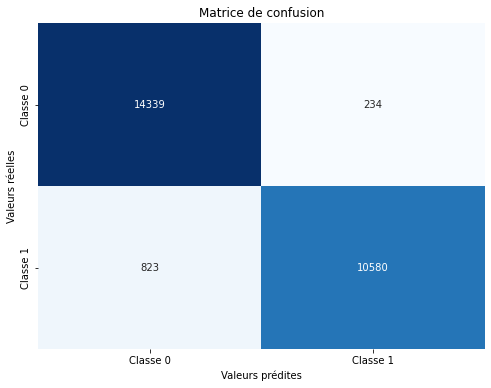

In [148]:
# Calcule de la matrice de confusion
conf_matrix = confusion_matrix(y_test, predictions.round())

plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Matrice de confusion')
plt.show()

## Conclusion 

**Dans ce rapport de classification, les mesures de précision, rappel et score F1 sont fournies pour deux classes distinctes :**

Classe 0 : Représente les passagers dont la satisfaction est classée comme "neutral or dissatisfied". La précision pour cette classe est de 0.94, le rappel est de 0.98, et le score F1 est de 0.96.

Classe 1 : Représente les passagers dont la satisfaction est classée comme "satisfied". La précision pour cette classe est de 0.97, le rappel est de 0.92, et le score F1 est de 0.95.

Ces mesures indiquent que le modèle a des performances élevées pour prédire la satisfaction des passagers, avec des scores équilibrés pour les deux classes. L'accuracy globale du modèle est de 0.96, ce qui signifie qu'il prédit correctement la classe pour environ 96% des instances de l'ensemble de test.


*Ce notebook a été créé par Sofiane EL FARTASS.*
